# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


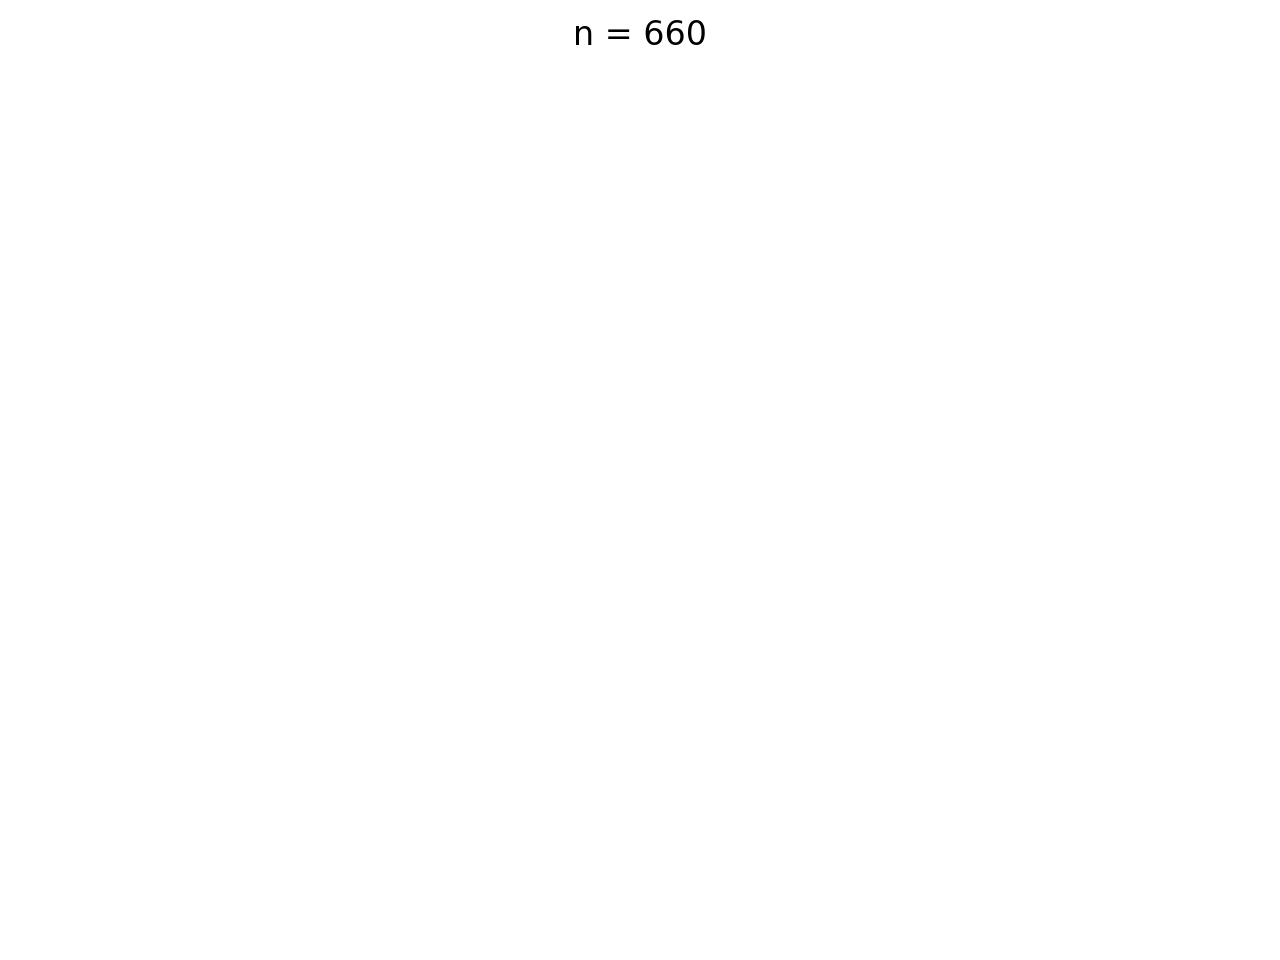

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import random

%matplotlib notebook

def generate_data():
    x1 = np.random.normal(-2.5, 1, 10000)
    x2 = np.random.gamma(2, 1.5, 10000)
    x3 = np.random.exponential(2, 10000)
    x4 = np.random.uniform(14,20, 10000)
    return [x1,x2,x3,x4]


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=.5)
axs = [ax1,ax2,ax3,ax4]
names = ['Normal','Gamma','Exponential','Uniform']
data = generate_data()

plt.axis([-7,21,0,0.6])
plt.show()
    
def render_hist(ax,x,title):
    ax.clear()
    ax.hist(x, normed=True, bins=20, alpha=0.5)
    ax.set_title(title)


def render(v=1000):
    for ax,title,x in zip(axs,names,data):
        render_hist(ax,x[:v],title)

n=100
curr=10
def update(step):
    curr=step*10
    render(curr)
    plt.suptitle('n = {}'.format(curr))
    
play = widgets.Play(
     interval=1500,
    value=1,
    min=1,
    max=100,
    step=10,
    description="Press play",
    disabled=False
)
slider = widgets.IntSlider()
widgets.jslink((play, 'value'), (slider, 'value'))


box=widgets.HBox([play, slider])
bar = interactive(update, step=slider)


title = widgets.HTML(value='<h1>Distribution Sample Explorer</h1>' )
display(title)
display(box)